# 言語処理100本ノック
# 第4章: 形態素解析

---

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果を`neko.txt.mecab`というファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は`matplotlib`もしくは`Gnuplot`を用いるとよい．

In [1]:
from tqdm import tqdm_notebook as tqdm
import os
import sys
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
if os.path.exists("neko.txt"):
    print("neko.txt has already been exist")
else:
    eval("wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt")

neko.txt has already been exist


In [4]:
ls

col1.txt                neko.txt.1              nlp100-Ch.6.ipynb
col1_2.txt              neko.txt.mecab          nlp100-Ch.7.ipynb
col2.txt                nlp100-Ch.1.ipynb       nlp100-Ch.8.ipynb
hightemp.txt            nlp100-Ch.2.ipynb       nlp100-Ch.9.ipynb
jawiki-country.json     nlp100-Ch.3.ipynb       nlp100-Ch10.ipynb
jawiki-country.json.gz  nlp100-Ch.4.ipynb
neko.txt                nlp100-Ch.5.ipynb


In [5]:
%%bash

mecab -o neko.txt.mecab neko.txt

In [6]:
ls -l *.txt

-rw-r--r--  1 atsuya  staff     243  9  1 02:33 col1.txt
-rw-r--r--  1 atsuya  staff     435  9  1 02:35 col1_2.txt
-rw-r--r--  1 atsuya  staff     192  9  1 02:33 col2.txt
-rw-r--r--@ 1 atsuya  staff     813  9  1 01:44 hightemp.txt
-rw-r--r--@ 1 atsuya  staff  965971 10 14 18:23 neko.txt


In [7]:
%%bash
head -n 10 neko.txt.mecab

EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


## 30. 形態素解析結果の読み込み

---

形態素解析結果（`neko.txt.mecab`）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（`surface`），基本形（`base`），品詞（`pos`），品詞細分類1（`pos1`）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [8]:
"""
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS

obj = {
    "surface":"suirface",
    "base":"base",
    "pos":"pos",
    "pos1":"pos1"
}

sentence = [obj1, obj2,..., objn]

"""
def line2dict(line: str, test=False) -> dict:
    
    try:
        if line != "EOS" and line != "":
            elements = line.split("\t")[1].split(",")
            elements.append(line.split("\t")[0])
        else:
            return
    except:
        return

    if test:
        print(elements)
    
    if 0 < len(elements) < 4:
        return {'surface': elements[-1],
                'base': '',
                'pos': '',
                'pos1': ''}
    else:
        return {'surface': elements[-1],
                'base': elements[6],
                'pos': elements[0],
                'pos1': elements[1]}


def morphemes2sentence(morphemes: list) -> list:

    sentences = []
    sentence = []

    for morpheme in morphemes:
        sentence.append(morpheme)
        if morpheme['pos'] == '記号' and morpheme['pos1'] == '句点':
            sentences.append(sentence)
            sentence = []

    return sentences

- 文から一行ずつ読んでリストにする

In [9]:
with open('neko.txt.mecab', encoding='utf-8') as f:
    # morphemes = [line2dict(line) for line in f]
    morphemes = []
    for line in f:
        dic = line2dict(line)
        if dic:
            morphemes.append(dic)

sentences = morphemes2sentence(morphemes)

In [10]:
test_s = "吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ"

line2dict(test_s, test=1)

['名詞', '代名詞', '一般', '*', '*', '*', '吾輩', 'ワガハイ', 'ワガハイ', '吾輩']


{'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'}

- 形態素のマッピング `morphemes`

In [11]:
print("全形態素数：", len(morphemes))
morphemes[:5]

全形態素数： 206365


[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'}]

- 一文毎にまとめたリスト `sentences`

In [12]:
print("全文数：", len(sentences))
sentences[:2]

全文数： 7486


[[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]]

- あつかいやすいように， `pandas.DataFrame`型にしたい…

`columns`を， `base`, `pos`, `pos1`, `surface`にする。

In [13]:
df_morphemes = []

for morph in morphemes:
    df_morphemes.append(morph.values())

df_morphemes = pd.DataFrame(df_morphemes)

df_morphemes.columns = ["surface", "base", "pos", "pos1"]

df_morphemes.head(10)

,surface,base,pos,pos1
0,,,記号,空白
1,吾輩,吾輩,名詞,代名詞
2,は,は,助詞,係助詞
3,猫,猫,名詞,一般
4,で,だ,助動詞,*
5,ある,ある,助動詞,*
6,。,。,記号,句点
7,名前,名前,名詞,一般
8,は,は,助詞,係助詞
9,まだ,まだ,副詞,助詞類接続


## 31. 動詞

---

動詞の表層形をすべて抽出せよ．

> `pandas`でスライスすればいいよね

In [14]:
verbs_surface = list(df_morphemes[(df_morphemes.pos == "動詞")]["surface"])

verbs_surface[0:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

## 32. 動詞の原形

---

動詞の原形をすべて抽出せよ．

> `pandas`でスライスすればいいよね

In [15]:
verbs_base = list(df_morphemes[(df_morphemes.pos == "動詞")]["base"])

verbs_base[0:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

## 33. サ変名詞

---

サ変接続の名詞をすべて抽出せよ．

> `pandas`でスライスすればいいよね

In [16]:
noun_sahen = df_morphemes[(df_morphemes.pos1 == "サ変接続")]

noun_sahen.head()

,surface,base,pos,pos1
19,見当,見当,名詞,サ変接続
38,記憶,記憶,名詞,サ変接続
92,話,話,名詞,サ変接続
187,装飾,装飾,名詞,サ変接続
233,突起,突起,名詞,サ変接続


## 34. 「AのB」

---

2つの名詞が「の」で連結されている名詞句を抽出せよ．

> 「の」を探して，それらの前後を抜き出し，どちらも名詞だった場合は抽出する！

In [17]:
"""
A
の
B

Aの部分を表すブールのリストが no_pre
"""
# ブールのリストにして前にずらす。
no_pre = list(df_morphemes.base == "の")[1:]
no_pre.append(False)

# 「の」の前で，かつ名詞である部分をブールでもつ
is_noun = (df_morphemes.pos == "名詞")
no_pre =  ((no_pre) & (is_noun))

# 2形態素先のチェック→前後(A,B)ともに名詞形だった部分を抽出
a = []

for idx, n in enumerate(no_pre):
    if n:
        if list(is_noun)[idx + 2] == True:
            a.append(True)
        else:
            a.append(False)
    else:
        a.append(False)


df_morphemes[a].head(10)

,surface,base,pos,pos1
115,彼,彼,名詞,代名詞
140,掌,掌,名詞,一般
147,書生,書生,名詞,一般
191,はず,はず,名詞,非自立
228,顔,顔,名詞,一般
240,穴,穴,名詞,一般
279,書生,書生,名詞,一般
281,掌,掌,名詞,一般
366,何,何,名詞,代名詞
401,肝心,肝心,名詞,形容動詞語幹


## 35. 名詞の連接

---

名詞の連接（連続して出現する名詞）を**最長一致**で抽出せよ．

> **最長一致**：なるべく長く対応…  
> どうする

In [18]:
# 愚直にループ回してみようかとおもう。

idx, cnt, max_cnt = 0, 0, 0
for i, morph in df_morphemes.iterrows():
    if morph.pos == "名詞":
        cnt += 1
        max_cnt, idx = cnt, i if cnt > max_cnt else None
    else:
        cnt = 0
        

In [19]:
max_cnt, idx

(28, 206364)

In [20]:
df_morphemes.iloc[idx-max_cnt:idx, :]

,surface,base,pos,pos1
206336,。,。,記号,句点
206337,©,*\n,名詞,サ変接続
206338,2018,*\n,名詞,数
206339,GitHub,*\n,名詞,一般
206340,",",*\n,名詞,サ変接続
206341,Inc,*\n,名詞,一般
206342,.,*\n,名詞,サ変接続
206343,Terms,*\n,名詞,固有名詞
206344,Privacy,*\n,名詞,固有名詞
206345,Security,*\n,名詞,固有名詞


## 36. 単語の出現頻度

---

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

> `pandas.DataFrame.value_counts`でイケる気が

In [21]:
word_freq = pd.DataFrame(df_morphemes.base.value_counts())
word_freq.columns = ["出現頻度"]
word_freq.reset_index(inplace=True)
word_freq.head(5)

,index,出現頻度
0,の,9194
1,。,7486
2,て,6848
3,、,6772
4,は,6420


- `名詞-一般`のみに限定するとどうなるか。上位15単語を抽出してみる

In [22]:
noun_freq = pd.DataFrame(df_morphemes[(df_morphemes.pos1 == "一般") & (is_noun)]
                         .base.value_counts())

noun_freq.columns = ["出現頻度"]
noun_freq.reset_index(inplace=True)
noun_freq.head(15)

,index,出現頻度
0,*\n,1746
1,主人,932
2,人,355
3,先生,274
4,人間,272
5,顔,271
6,猫,248
7,細君,213
8,鼻,199
9,自分,175


## 37. 頻度上位10語

---

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

> `pandas.plot`を用いる。円グラフと棒グラフを2つ描画し，それらを`subplot`で並べようかと思う。

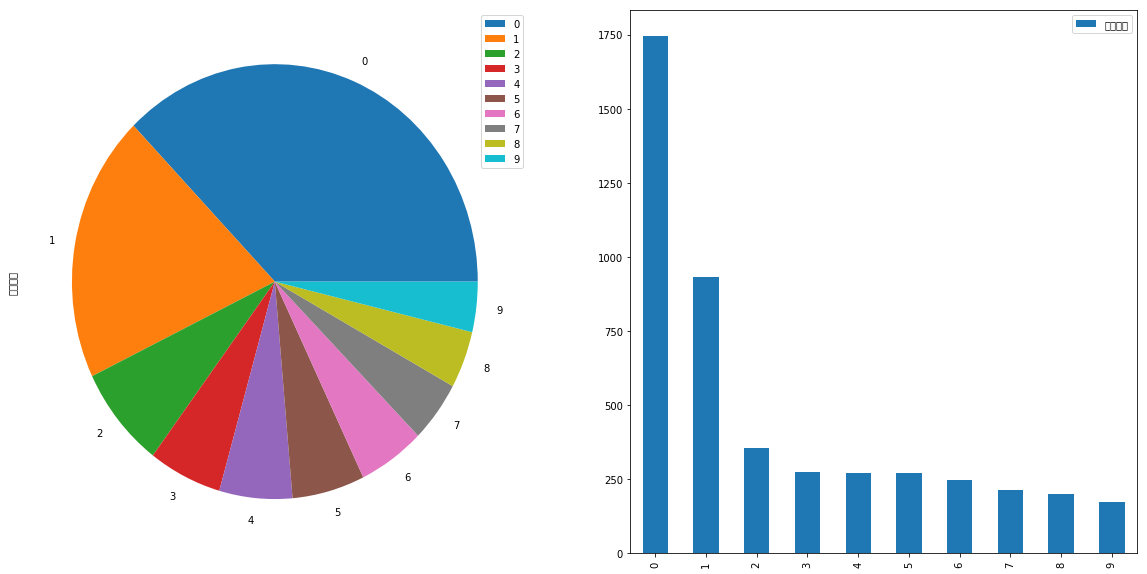

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

noun_freq.iloc[:10,:].plot(kind="pie", y="出現頻度",
                           subplotｓ=True, ax=axes[0])

noun_freq.iloc[:10,:].plot(kind="bar", ax=axes[1])

## 38. ヒストグラム

---

単語の出現頻度のヒストグラム（横軸に`出現頻度`，縦軸に`出現頻度をとる単語の種類数`を棒グラフで表したもの）を描け．

> matplotlib

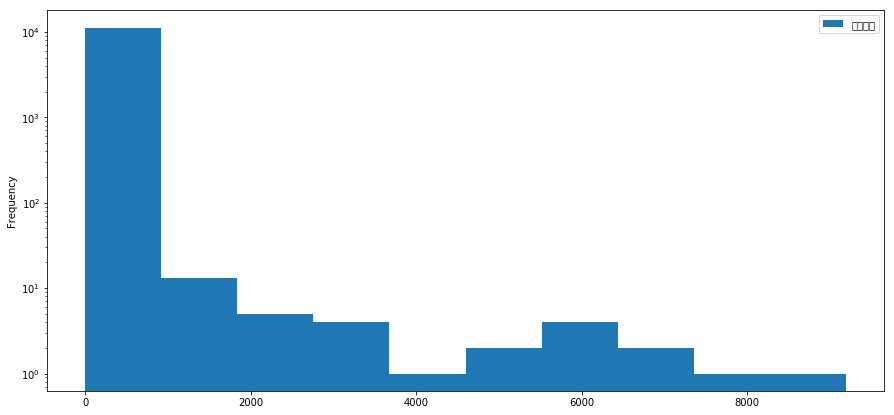

In [43]:
word_freq.plot(kind="hist", logy=True, figsize=(15,7))

## 39. Zipfの法則

---

単語の`出現頻度順位`を横軸，その`出現頻度`を縦軸として，両対数グラフをプロットせよ．

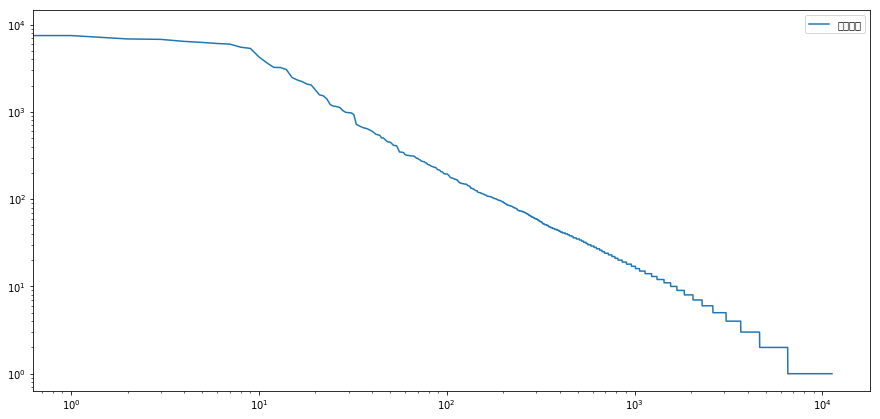

In [42]:
word_freq.plot(x=word_freq.index, y="出現頻度", kind="line", 
               logx=True, logy=True, figsize=(15,7))